# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [172]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

from panel.interact import interact


In [106]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [108]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!

import requests
import json
import csv


file_path_sfo = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path_sfo, index_col="year")

location_file_path = Path("Data/neighborhoods_coordinates.csv")
location_data= pd.read_csv(location_file_path)





- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [112]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    sfo_data_by_year = sfo_data.groupby(["year"])["housing_units"].mean()
    sfo_data_by_year_max = sfo_data_by_year.max()


    sfo_data_by_year_plot = plt.figure()
    housing_units_plot = sfo_data_by_year.plot.bar(x='year', ylim=[370000, sfo_data_by_year_max], title="Housing Units in San Fransisco from 2010 to 2016")
    plt.close(sfo_data_by_year_plot)

    return pn.pane.Matplotlib(sfo_data_by_year_plot)

In [130]:
    


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    sfo_data_average = sfo_data.groupby(["year"]).mean()

    sfo_data_sales_rent = sfo_data_average.iloc[:, [0, 2]]
    
    
    average_gross_rent_plot = plt.figure()
    average_rent_fig = sfo_data_sales_rent["gross_rent"].plot(xlim = (2010,2016), title="Plot average gross rent", color="red", xlabel="Year", ylabel="Average Gross Rent")
    plt.close(average_gross_rent_plot)

    return pn.pane.Matplotlib(average_gross_rent_plot)
    

In [132]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    sfo_data_average = sfo_data.groupby(["year"]).mean()

    sfo_data_sales_rent = sfo_data_average.iloc[:, [0, 2]]
    
    
    average_sales_plot = plt.figure()
    average_sales_fig = sfo_data_sales_rent["sale_price_sqr_foot"].plot(xlim = (2010,2016), title="Plot average sale price", color="green", xlabel="Year", ylabel="Average Sale Price")
    plt.close(average_sales_plot)

    return pn.pane.Matplotlib(average_sales_plot)
    

In [144]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    sfo_groupby_year_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()

    sfo_average_sales = sfo_groupby_year_neighborhood["sale_price_sqr_foot"]

    sfo_average_gross_rent = sfo_groupby_year_neighborhood["gross_rent"]
    
    average_price_neighborhood_plot = sfo_average_sales.hvplot(groupby="neighborhood", xlabel = "Year", ylabel = "Average Sale price", title="HV plot Average sale price vs year interacting with neighborhood", widget_location='left_top')
    
    #plt.close(average_price_neighborhood_plot)
    
    return average_price_neighborhood_plot
    
    #sfo_average_sales.hvplot(groupby="neighborhood", xlabel = "Year", ylabel = "Average Sale price", title="HV plot Average sale price vs year interacting with neighborhood", widget_location='left_top')

In [148]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!
    
    sale_price_descending = sfo_data.groupby(["neighborhood"]).mean().sort_values(ascending=False, by="sale_price_sqr_foot")
    top10_expensive = sale_price_descending.head(10)
    
    top10_expensive_neighborhood_plot = top10_expensive["sale_price_sqr_foot"].hvplot.bar(xlabel="Neighborhood", rot=90, ylabel="Avg.Sale Price per Square Foot", figsize=(20,20), title="Top 10 Expensive Neighborhoods in SFO", width=500, height = 400, legend='top_left')
    
    return top10_expensive_neighborhood_plot

In [153]:
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!
    sfo_groupby_year_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
    top10expensive_year_neighborhood = sfo_groupby_year_neighborhood.sort_values(ascending=False, by="sale_price_sqr_foot")
    
    sfo_df = sfo_groupby_year_neighborhood.reset_index()
    most_expensive_rent_sales_plot = sfo_df.hvplot.bar(x='year', y=['sale_price_sqr_foot', 'gross_rent'], title='Expensive Neighborhoods in SFO', xlabel='Neighborhood', ylabel='Num Housing Units', groupby="neighborhood", rot=90, height = 500, widget_location='top')
    
    return most_expensive_rent_sales_plot

In [157]:
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
    sale_price_descending = sfo_data.groupby(["neighborhood"]).mean().sort_values(ascending=False, by="sale_price_sqr_foot")
    df_costs = sale_price_descending.head(10)

    return px.parallel_coordinates(df_costs.reset_index(), color='sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)
    
    

In [161]:
def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    sale_price_descending = sfo_data.groupby(["neighborhood"]).mean().sort_values(ascending=False, by="sale_price_sqr_foot")
    df_costs = sale_price_descending.head(10)
    return px.parallel_categories(df_costs.reset_index(), color='sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)

In [163]:
def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    neighborhood_meanvalues = sfo_data.groupby('neighborhood').mean().reset_index()

    neighborhood_meanvalues.rename(columns = {'neighborhood':'Neighborhood'}, inplace = True)
    
    combined_df = location_data.merge(neighborhood_meanvalues, on='Neighborhood')
    
    px.set_mapbox_access_token(map_box_api)

    # Create a scatter mapbox to analyze neighborhood info
    # YOUR CODE HERE!

    map_1 = px.scatter_mapbox(
        combined_df,
        lat="Lat",
        lon="Lon",
        color="gross_rent",
        size='sale_price_sqr_foot',
        width=900,
        color_continuous_scale=px.colors.cyclical.IceFire,
        hover_name="Neighborhood",
        height=500,
        zoom=10.5,
        size_max=15,
        title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
        
    )

    return map_1
    

In [169]:
def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!
    sfo_groupby_year_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
    
    df_expensive_neighborhoods = sfo_groupby_year_neighborhood.reset_index()
    
    mean_sale_price = df_expensive_neighborhoods["sale_price_sqr_foot"].mean()


    final_df = df_expensive_neighborhoods[df_expensive_neighborhoods["sale_price_sqr_foot"]>mean_sale_price]

    sunburst_plot = px.sunburst(
        final_df,
        names="neighborhood",
        path=['year', 'neighborhood'],
        color="gross_rent",
        values="sale_price_sqr_foot",
        color_continuous_scale='RdBu',
        height=700,
        title="Cost Analysis of Most Expensive neighborhoods in San Fransisco per Year"

    )
    
    return sunburst_plot

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [184]:
# Create a Title for the Dashboard
# YOUR CODE HERE!


# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the dashboard
# YOUR CODE HERE!

title = '#Interactive SFO neighborhood map'
neighborhood_map = pn.Column(pn.Row(title), neighborhood_map())

yearly_sfo_data = pn.Column(housing_units_per_year(), average_gross_rent(), average_sales_price())


neighborhood_analysis = pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())

parallel_plots = pn.Column( 
    parallel_categories(),
    parallel_coordinates()
)


# Create tabs

SFO_housing_dashboard = pn.Tabs(("SFO Neighborhood", neighborhood_map), 
("Yearly SFO Market Data", yearly_sfo_data),
("Neighborhood Analysis", neighborhood_analysis), 
("Interactive Market Analysis by Neighborhood", parallel_plots))




## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Row
            [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [2] Column
        [0] Row
            [0] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
            [1] HoloViews(DynamicMap, widget_location='left_top')
        [1] HoloViews(Bars)
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
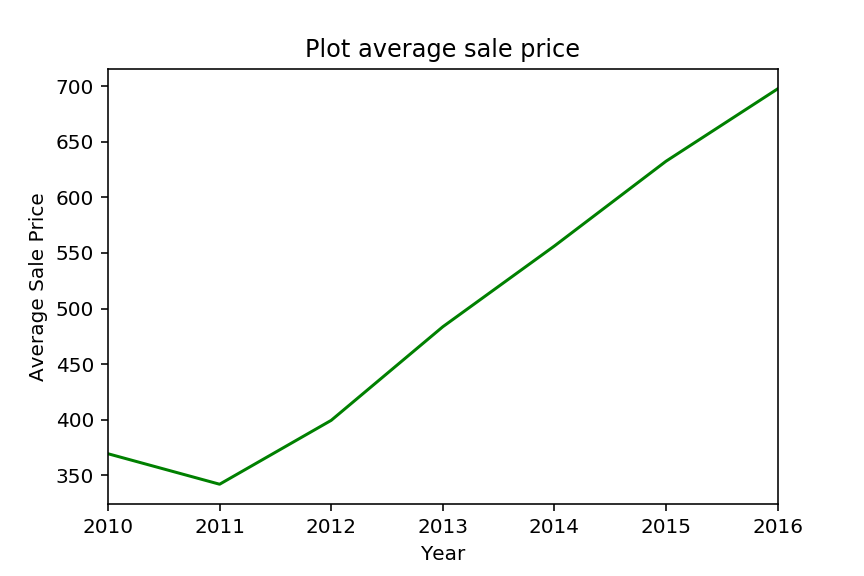
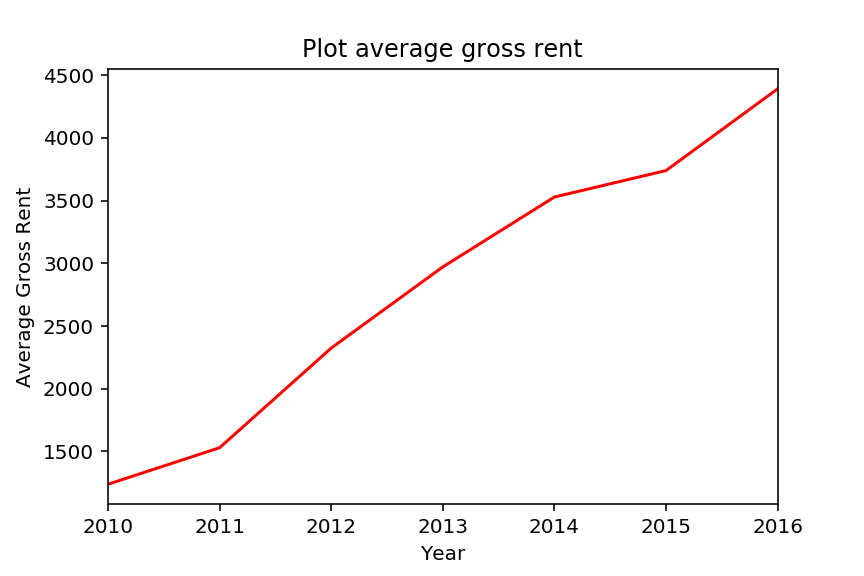
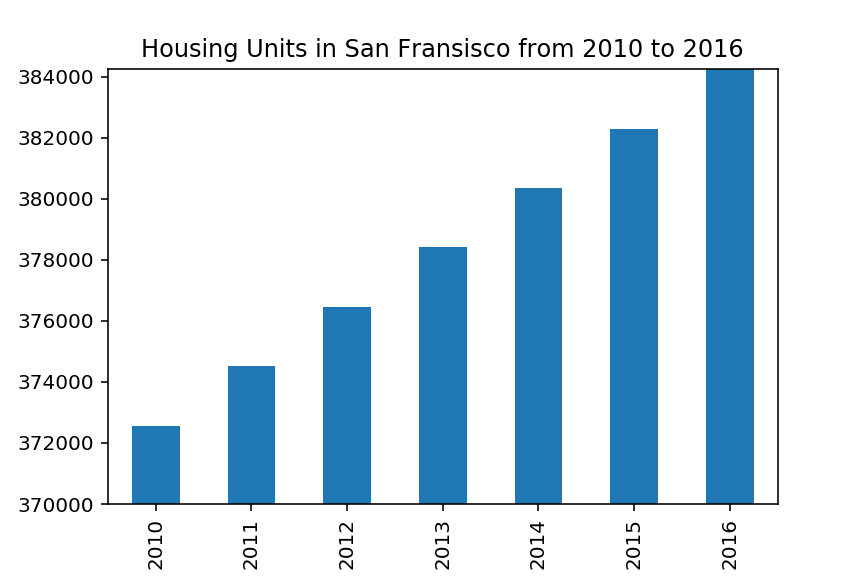

In [185]:
# Serve the# dashboard
# YOUR CODE HERE!
SFO_housing_dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

Matplotlib(Figure)
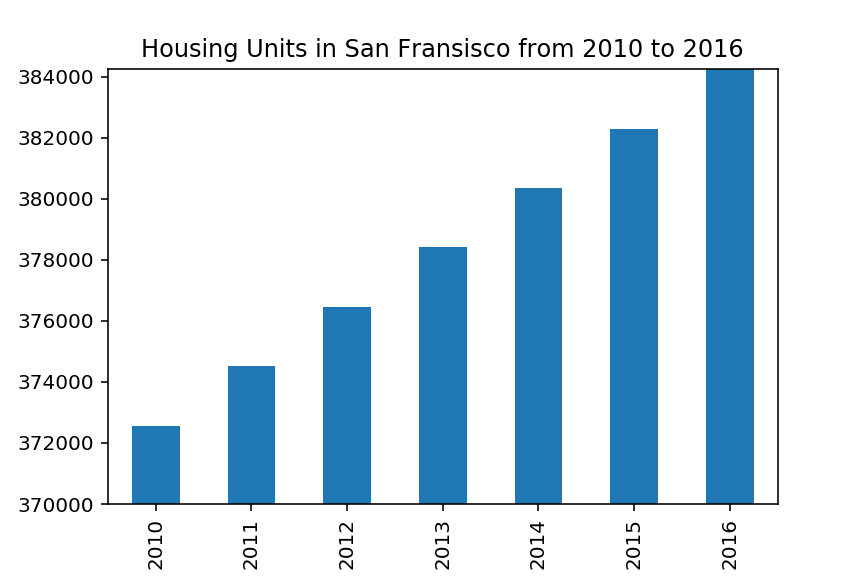

In [113]:
housing_units_per_year()

Matplotlib(Figure)
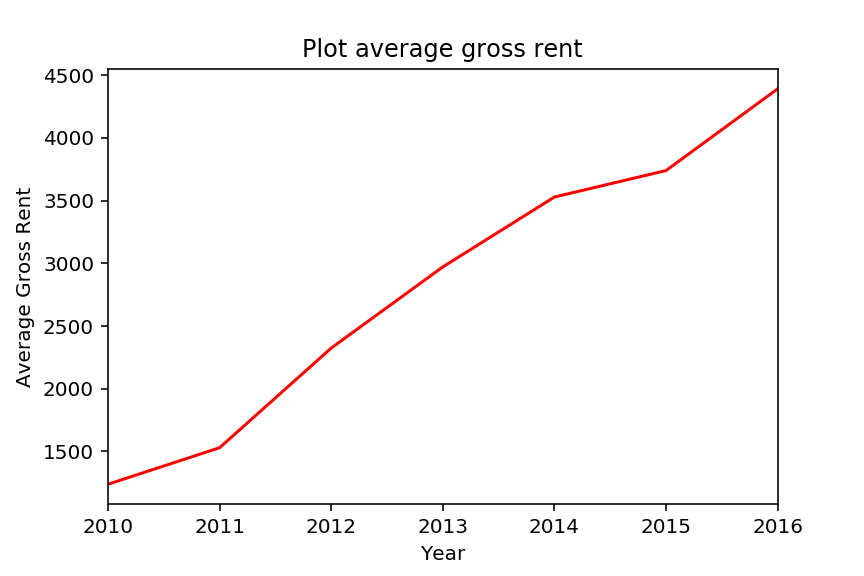

In [131]:
average_gross_rent()

Matplotlib(Figure)
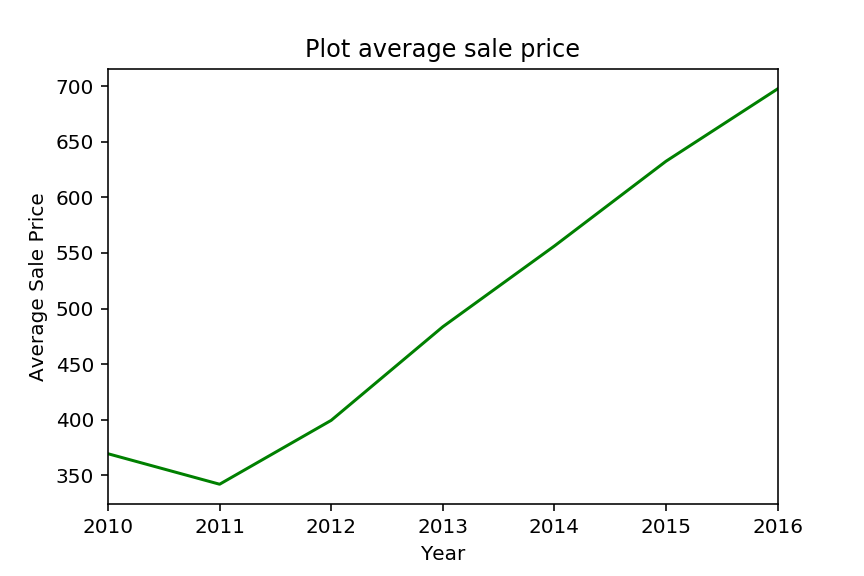

In [133]:
average_sales_price()

In [145]:
average_price_by_neighborhood()

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [149]:
top_most_expensive_neighborhoods()


:Bars   [neighborhood]   (sale_price_sqr_foot)

In [154]:
most_expensive_neighborhoods_rent_sales()

Column
    [0] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [2] HSpacer()
    [1] HoloViews(DynamicMap, widget_location='top')

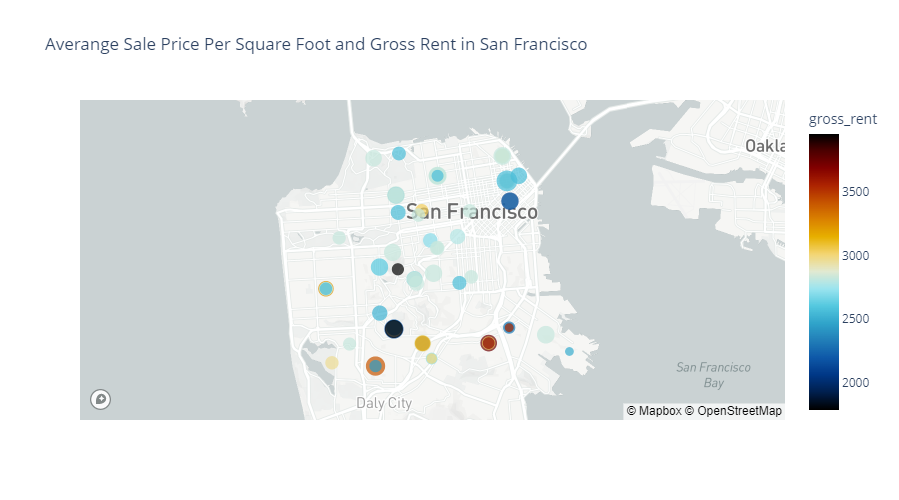

In [164]:
neighborhood_map().show()

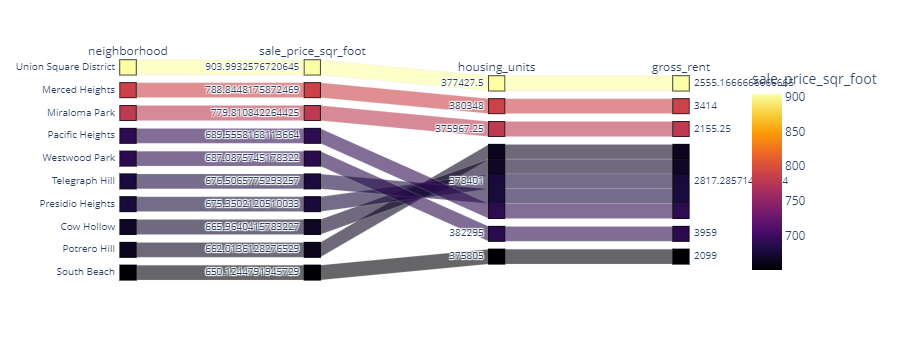

In [162]:
parallel_categories()

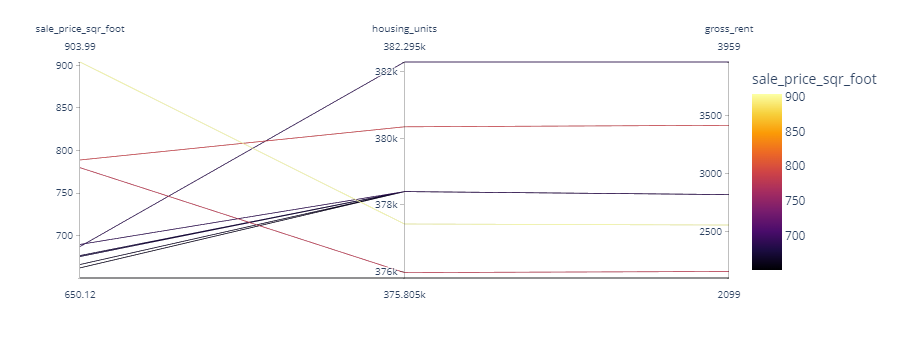

In [158]:
parallel_coordinates()

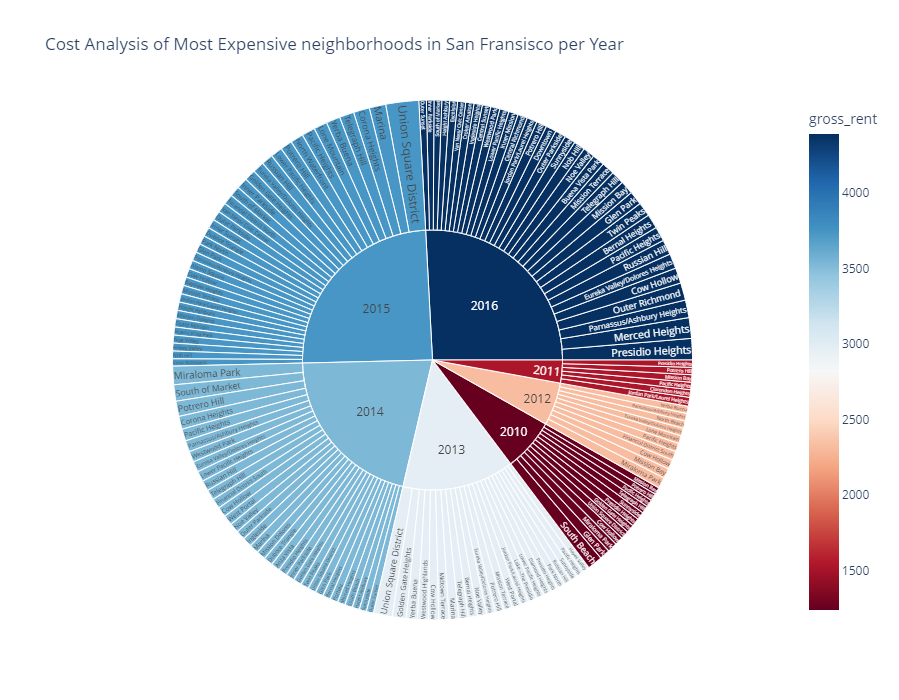

In [170]:
sunburst()